# **MÓDULO 13**

## Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Análise inicial



In [28]:
df = pd.read_csv("supermercado.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB


In [29]:
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index()
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median().reset_index()

media_por_categoria = media_por_categoria.rename(columns={'Preco_Normal': 'Media'}).round(2)
mediana_por_categoria = mediana_por_categoria.rename(columns={'Preco_Normal': 'Mediana'}).round(2)

comparacao = pd.merge(media_por_categoria, mediana_por_categoria, on='Categoria')
comparacao['Diferenca'] = (comparacao['Media'] - comparacao['Mediana']).round(2)

desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
desvio_padrao_por_categoria = desvio_padrao_por_categoria.rename(columns={'Preco_Normal': 'Desvio_Padrao'}).round(2)

comparacao = pd.merge(comparacao, desvio_padrao_por_categoria, on='Categoria')

comparacao


,Categoria,Media,Mediana,Diferenca,Desvio_Padrao
0,belleza-y-cuidado-personal,1783.56,1569.0,214.56,2210.04
1,comidas-preparadas,3095.04,3290.0,-194.96,2019.91
2,congelados,2108.04,1519.0,589.04,2111.54
3,frutas,1724.47,1195.0,529.47,1639.15
4,instantaneos-y-sopas,765.49,439.0,326.49,1170.23
5,lacteos,2385.22,989.0,1396.22,3925.82
6,verduras,1343.30,1180.0,163.30,1012.70


**Comentário:** Optei por criar um *Data Frame* auxiliar para realizar os exercícios 1,2 e 3. Acabei aprendendo as a uar o `merge` e o `rename`.

O principal ponto que me fez optar por realizar esse *Data Frame* foi para a Diferença entre a Média e a Mediana no exercício 1. Eu poderia realizar a tarefa visualizando e comparando um por um visualmente, mas achei mais sofisticado criar uma coluna e aplicar uma lógica para identificar quando a média é maior que a mediana. Além disso, pensando em um volume maior de dados, seria muito trabalhoso comparar um a um.

Por fim, vale dizer que a diferença poderia ser do tipo boleano, porém eu perderia a magnitude da diferença entre a média e mediana se optasse por isso. Isto posto, preferi deixar dessa forma.

## 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto. Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [30]:
df_media = comparacao[['Categoria', 'Media']].sort_values(by='Media', ascending=False).reset_index(drop=True)
df_media

,Categoria,Media
0,comidas-preparadas,3095.04
1,lacteos,2385.22
2,congelados,2108.04
3,belleza-y-cuidado-personal,1783.56
4,frutas,1724.47
5,verduras,1343.30
6,instantaneos-y-sopas,765.49


In [31]:
df_mediana = comparacao[['Categoria', 'Mediana']].sort_values(by='Mediana', ascending=False).reset_index(drop=True)
df_mediana

,Categoria,Mediana
0,comidas-preparadas,3290.0
1,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
4,verduras,1180.0
5,lacteos,989.0
6,instantaneos-y-sopas,439.0


In [32]:
media_menor = comparacao.loc[comparacao['Diferenca'] > 0]
media_maior = comparacao.loc[comparacao['Diferenca'] < 0]

print("Categorias com média menor que a mediana:", media_maior['Categoria'].tolist())
print("\nCategorias com média maior que mediana:", media_menor['Categoria'].tolist())

Categorias com média menor que a mediana: ['comidas-preparadas']

Categorias com média maior que mediana: ['belleza-y-cuidado-personal', 'congelados', 'frutas', 'instantaneos-y-sopas', 'lacteos', 'verduras']


## 2 - Traga o desvio padrão por categoria de produto. Qual o comportamento da média e mediana nas categorias com maior desvio?

In [33]:
df_desvio = comparacao[['Categoria', 'Desvio_Padrao']].sort_values(by='Desvio_Padrao', ascending=False).reset_index(drop=True)
df_desvio

,Categoria,Desvio_Padrao
0,lacteos,3925.82
1,belleza-y-cuidado-personal,2210.04
2,congelados,2111.54
3,comidas-preparadas,2019.91
4,frutas,1639.15
5,instantaneos-y-sopas,1170.23
6,verduras,1012.70


In [40]:
comparacao_maior_desvio = comparacao.sort_values(by='Desvio_Padrao', ascending=False).reset_index(drop=True)

comparacao_maior_desvio

,Categoria,Media,Mediana,Diferenca,Desvio_Padrao
0,lacteos,2385.22,989.0,1396.22,3925.82
1,belleza-y-cuidado-personal,1783.56,1569.0,214.56,2210.04
2,congelados,2108.04,1519.0,589.04,2111.54
3,comidas-preparadas,3095.04,3290.0,-194.96,2019.91
4,frutas,1724.47,1195.0,529.47,1639.15
5,instantaneos-y-sopas,765.49,439.0,326.49,1170.23
6,verduras,1343.30,1180.0,163.30,1012.70


### Comportamento da média e mediana nas categorias com maior desvio

1. Nota-se que a categoria com maior **desvio padrão**, é a categoria que tem a maior diferença entre média e mediana.
2. Dois das duas maiores diferenças entre média e mediana possuem o maior desvio padrão;
3. O único que a diferença é maior, mas não está no top 3 de maior desvio padrão é a categoria `instantaneos-y-sopas`. (!)

(!) Por curiosidade, plotei o blox-plot da categoria `instantaneos-y-sopas` e apesar de ter uma diferença considerável entre a média e mediana, ele não tem tanto *outliers* ao ser comparado com `lacteos`; 

## 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

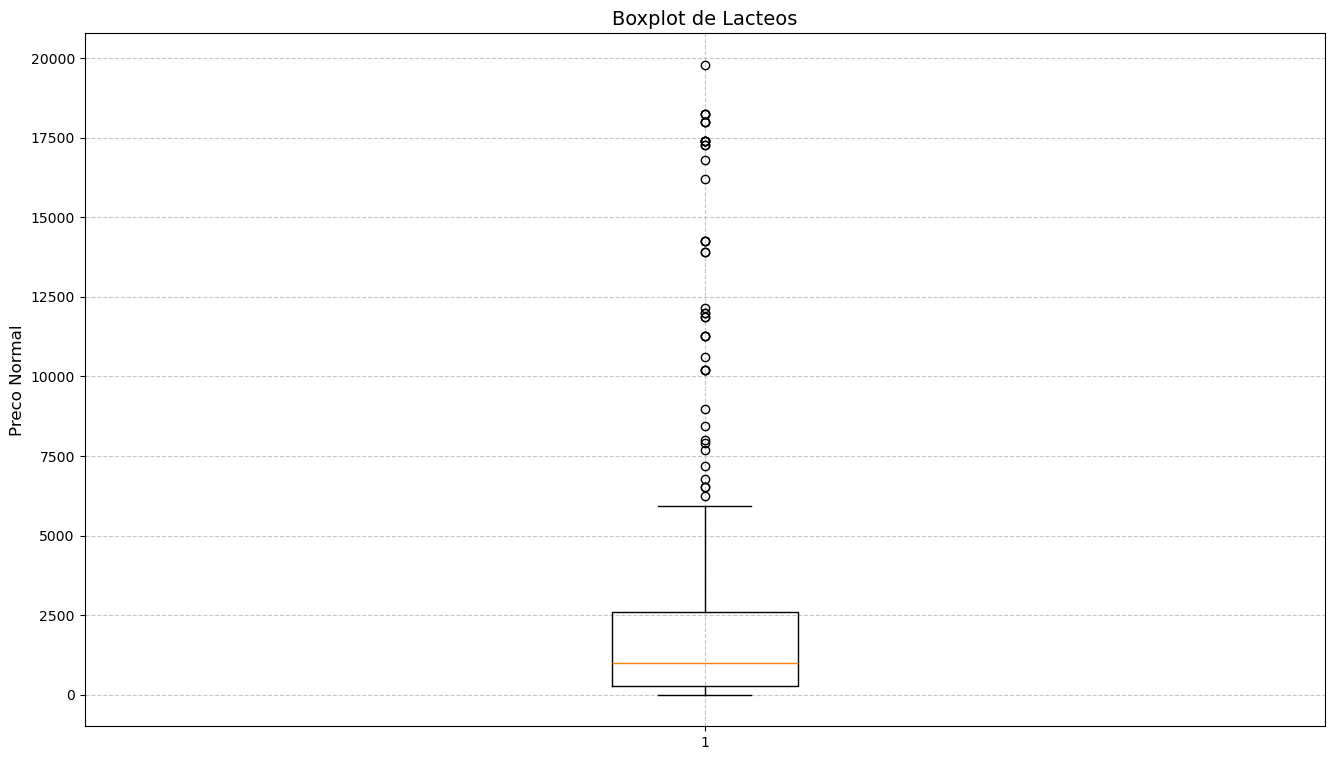

In [39]:
# Criando o boxplot apenas para a coluna de salário
plt.figure(figsize=(16, 9))
plt.boxplot(df.loc[df['Categoria'] == 'lacteos', 'Preco_Normal'])

# Legendas e rótulos:
plt.title('Boxplot de Lacteos', fontsize=14)
plt.ylabel('Preco Normal', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

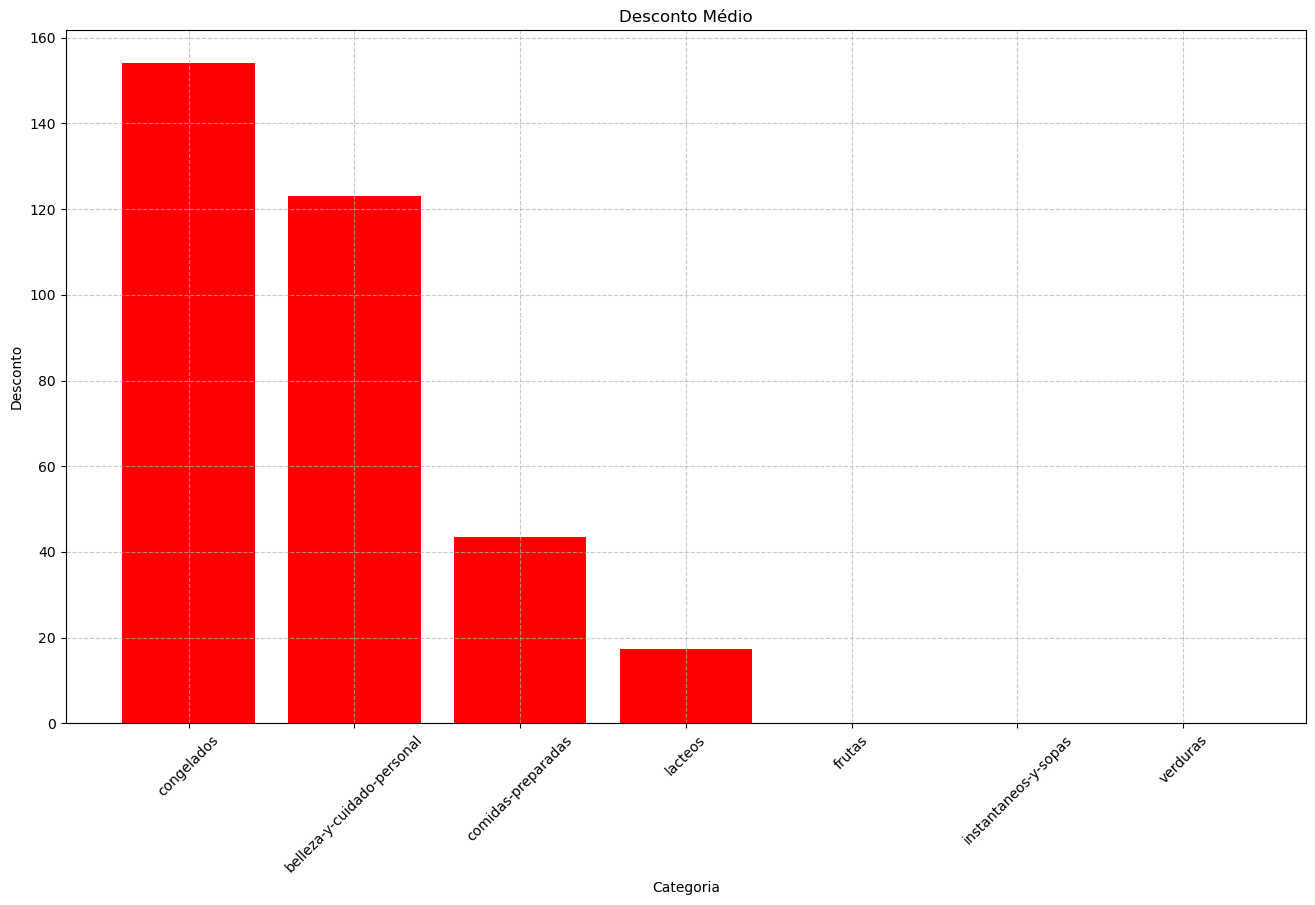

In [36]:
desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 9))
plt.bar(desconto_por_categoria.index, desconto_por_categoria.values, color='red')
plt.title("Desconto Médio")
plt.xlabel('Categoria')
plt.ylabel('Desconto')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # se quiser inclinar os nomes das categorias
plt.show()

In [37]:
# Aqui agrupamos os dados do DataFrame por profissão e estado civil, e calculando a média do salário para cada profissão e estado civil
df_sem_zero = df[df['Desconto'] != 0]

desconto_por_categoria_marca = df_sem_zero.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Criando o gráfico de treemap com os salários por profissão, usando as cores para representar o estado civil
fig = px.treemap(desconto_por_categoria_marca,
                path=['Categoria', 'Marca'],
                values='Desconto',
                title='Desconto Médio por Categoria e Marca',
                color='Desconto',
                color_continuous_scale='plasma',
                width=1280,
                height=720
                )
fig.show()